## Imports and constants

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numbers
from constants import X_PATH, Y_PATH, TF_PATH, TRAINING_PATH

## Track Feature Data

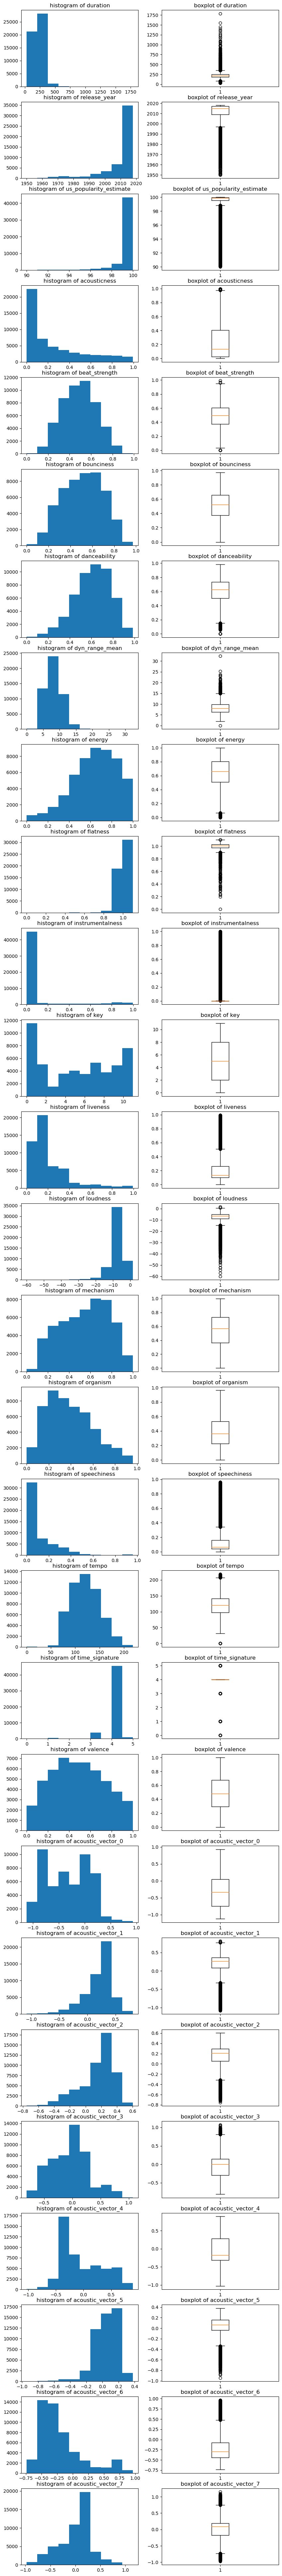

In [3]:
tf_data = pd.read_csv(TF_PATH)

labels = tf_data.columns.tolist()

tf = tf_data.to_numpy()

num_columns = []
# get the numeric columns
for i, value in enumerate(tf[0]):
    if isinstance(value, numbers.Real):
        num_columns.append(i)

f, axes = plt.subplots(len(num_columns), 2, figsize=(10, 100))
for i, i_column in enumerate(num_columns):
    axes[i, 0].set_title(f'histogram of {labels[i_column]}')
    axes[i, 0].hist(tf[:, i_column])

    axes[i, 1].set_title(f'boxplot of {labels[i_column]}')
    axes[i, 1].boxplot(tf[:, i_column])

plt.show()


## Session Data

**What is the percentage of skipped tracks**

percentage of skips: 0.5171789373361925
percentage of skips in last song: 0.4043


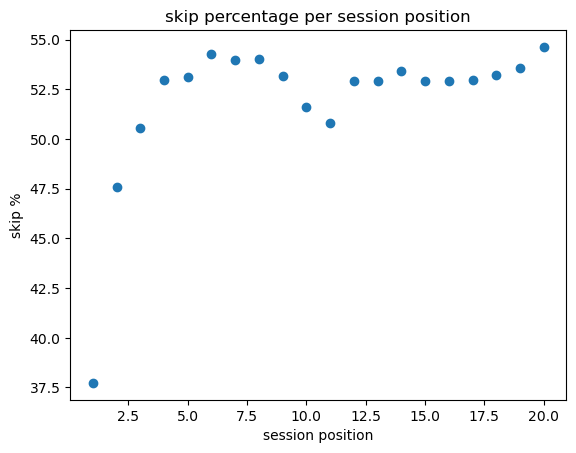

In [23]:
session_data = pd.read_csv(SESSION_PATH)
labels = session_data.columns.tolist()
sessions = session_data.to_numpy()

skip_true = session_data[session_data['skip_2'] == True]
print(f'percentage of skips: {len(skip_true) / len(session_data["skip_2"])}')

skip_true_last = skip_true[skip_true['session_position'] == skip_true['session_length']]
last = session_data[session_data['session_position'] == session_data['session_length']]
print(f'percentage of skips in last song: {len(skip_true_last) / len(last)}')

p_skip = []
session_range = 20
for i in range(1, 21):
    p = len(skip_true[skip_true['session_position'] == i]) / len(session_data[session_data['session_position'] == i])
    p_skip.append(p * 100)

plt.title('skip percentage per session position')
plt.xlabel('session position')
plt.ylabel('skip %')
plt.scatter(range(1, 21), p_skip)
plt.show()



## X and y

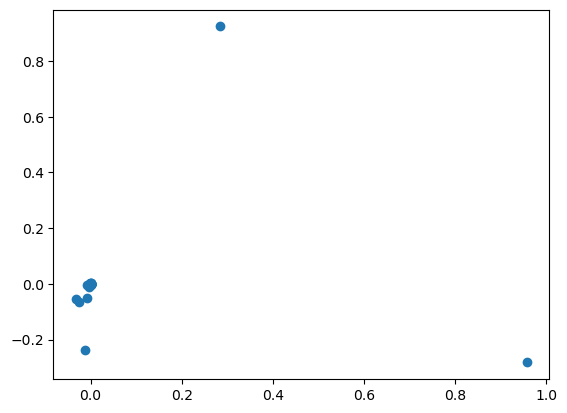

In [4]:
from sklearn.decomposition import PCA
X_data = pd.read_csv(X_PATH)

X_attributes = X_data.columns.tolist()
X = X_data.to_numpy()[:,1:]

pca = PCA(n_components=2)
pca.fit(X)

plt.scatter(pca.components_[0, :], pca.components_[1, :])

